In [82]:
import numpy as np
import params
from scipy.optimize import root
from matplotlib import pyplot as plt
import time

S = 80
beta = .96
beta_s = beta ** (80 / S)
beta1 = .55

delta = .05 
delta_s = 1 - (1 - delta) ** (80/S)
print(delta_s)

sigma = 3
A = 1
alpha = .35
nvec = np.zeros((S, 1))
for i in range(S):
    if i+1 < (2*S / 3): nvec[i] = 1
    else: nvec[i] = .2
        
L = np.sum(nvec)
SStol = 1.E-10
xi = .4
T = 40

0.050000000000000044


In [92]:
f_params = (nvec, A, alpha, delta_s)
def feasible(f_params, bvec_guess):
    '''
    Purpose: 
        Determine the feasibility of a given steady state guess based on a set of wealth allocations
    Inputs 
        f_params = (nvec, A, alpha, delta)
        bvec guess = np.array((S-1, S))
    Outputs 
        b_cnstr (boolean list, len=S-1) [which element of bvec guess is 
            likely responsible for any of the consumption nonnegativity 
            constraint violations identified in c cnstr]
            - If the first element of c_cnstr is True, then the first element of b cnstr is True. 
            - If the ith element of c_cnstr is true, then the ith, and i-1st element of b cnstr is True.
            - if the last element of c_cnstr is True, then the last element of b cnstr is True.
        c_cnstr (boolean list, len=S) [True if cs ≤ 0]
        K_cnstr (boolean list, len=1) [True if K ≤ 0]
    '''
    nvec, A, alpha, delta = f_params
    # First we want to check whether the savings are collectively nonnegative
    K = np.sum(bvec_guess)
    K_cnstr = np.array([K <= 0])
   
    # Calculate wage and rental rate parameter 
    r = alpha * A * ( (np.sum(nvec) / abs(K)) ** (1-alpha) )
    w = (1-alpha) * A * ( ( abs(K) / np.sum(nvec)) ** (alpha) )
    if (K <= 0):
        r = r * -1
        w = w * -1
    
    
    # Each Generations Consumption
    c = np.zeros((S))
    c[0] = w*nvec[0] - bvec_guess[0]
    c[-1] = w*nvec[-1] + bvec_guess[-1]*(1+r)
    
    for i in range(1,S-1):
        c[i] = w*nvec[i] - bvec_guess[i] + bvec_guess[i-1]*(1+r)
    c_cnstr = np.array(c <= 0)
    
    # Why are certain generations getting negative consumption
    b_cnstr = np.zeros((S-1), dtype=bool)
    if (c_cnstr[0]): b_cnstr[0] = True
    if (c_cnstr[-1]): b_cnstr[-1] = True
    for i in range(1, S-1):
        if (c_cnstr[i]):
            b_cnstr[i-1] = True
            b_cnstr[i] = True
            
    return [b_cnstr, c_cnstr, K_cnstr]



In [94]:
bvec_guess = np.ones(S-1)
rv = feasible(f_params, bvec_guess)
        
print("k_cnstr:", rv[2])
print("c_cnstr:", rv[1])
print("b_cnstr:", rv[0])
if sum(rv[0]) + sum(rv[1]) + sum(rv[2]) == 0:
    print("This is a feasible guess")
else:
    print("This is not a feasible guess")

k_cnstr: [False]
c_cnstr: [ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
b_cnstr: [ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False Fa

In [95]:
bvec_guess = \
  np.array([-0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
           -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
           -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
           -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
           -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
           -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
           -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
           -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
           -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
           -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2])

rv = feasible(f_params, bvec_guess)
print("k_cnstr:", rv[2])
print("c_cnstr:", rv[1])
print("b_cnstr:", rv[0])
if sum(rv[0]) + sum(rv[1]) + sum(rv[2]) == 0:
    print("This is a feasible guess")
else:
    print("This is not a feasible guess")


k_cnstr: [False]
c_cnstr: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False  True False False False False False False False  True False False
 False False False False False  True False False False False False False
 False  True False False False False False False]
b_cnstr: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True False False False False False False
  True  True False False False False False False  True  True False False
 False False False False  True  True False False False False False False
  True  True False False False False Fa

In [96]:
bvec_guess = \
    np.array([-0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
       -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
       -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
       -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
       -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
       -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
       -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

rv = feasible(f_params, bvec_guess)
print("k_cnstr:", rv[2])
print("c_cnstr:", rv[1])
print("b_cnstr:", rv[0])
if sum(rv[0]) + sum(rv[1]) + sum(rv[2]) == 0:
    print("This is a feasible guess")
else:
    print("This is not a feasible guess")


k_cnstr: [False]
c_cnstr: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
b_cnstr: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True False False False False False False
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False Fa

In [97]:
bvec_guess = np.ones((S-1))/2  
rv = feasible(f_params, bvec_guess)
print("k_cnstr:", rv[2])
print("c_cnstr:", rv[1])
print("b_cnstr:", rv[0])
if sum(rv[0]) + sum(rv[1]) + sum(rv[2]) == 0:
    print("This is a feasible guess")
else:
    print("This is not a feasible guess")

k_cnstr: [False]
c_cnstr: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
b_cnstr: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False Fa

We know that: $$ r_{t}=\alpha A\left(\frac{L_{t}}{K_{t}}\right)^{1-\alpha}-\delta$$ and $$w_{t}=(1-\alpha) A\left(\frac{K_{t}}{L_{t}}\right)^{\alpha} $$ 
We also know that $$ \forall s \in 1 < s < S \ \ c_s = wn_s + b_s(1+r) - b_{s+1} $$
So as a rule: $$ b_s \left(1 + \alpha A \left ( \frac{L}{K} \right)^{1-\alpha} - \delta \right) + n \alpha A \left ( \frac{K}{L} \right)^{\alpha} \geq b_{s+1}$$

In [87]:
params = (beta_s, sigma, nvec, L, A, alpha, delta_s, SStol)
def funcfact(params):
    def utility(c):
        '''
        utility function
        Inputs:
            consumption
        Outputs
        '''
        if (c <= 0):
            return -9999999
        else:
            u = ((c ** (1-sigma)) - 1)/(1-sigma)
            return u
    def du(c):
        '''
        utility function
        Inputs:
            consumption
        Outputs
        '''
        if (c <= 0): return -99999999
        else:
            return (c ** (-sigma))
    
    return utility, du


        
u, du = funcfact(params)

b_ss       : [ 0.06051916  0.12544728  0.19494146  0.26916448  0.34828508  0.4324782
  0.52192511  0.61681372  0.71733878  0.82370216  0.9361131   1.05478846
  1.17995303  1.31183979  1.45069022  1.59675462  1.75029241  1.91157248
  2.08087353  2.25848442  2.44470457  2.63984429  2.84422524  3.05818078
  3.28205647  3.51621045  3.76101392  4.01685163  4.28412236  4.56323944
  4.85463127  5.15874188  5.47603149  5.8069771   6.15207312  6.51183199
  6.88678483  7.27748213  7.68449446  8.10841321  8.54985132  9.00944409
  9.48784998  9.98575149 10.50385597 11.0428966  11.60363328 12.18685362
 12.79337395 13.42404038 14.07972987 14.76135135 15.4698469  15.10214628
 14.72305541 14.33215564 13.92901306 13.51317797 13.08418424 12.64154879
 12.1847709  11.71333163 11.2266931  10.72429784 10.20556806  9.66990489
  9.11668766  8.54527306  7.95499433  7.34516041  6.71505505  6.06393589
  5.39103352  4.69555046  3.97666018  3.23350602  2.46520008  1.67082209
  0.84941826]
c_ss       : [ 1.3195392 

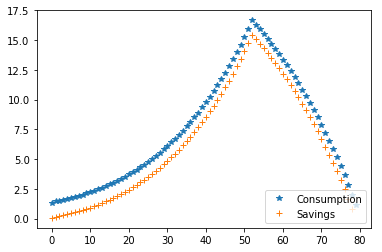

In [88]:
def modeldef(b, beta, sigma, nvec, L, A, alpha, delta):
    '''
        Defines the model
        Inputs:
            v - vector of solutions 
            beta - discount rate
            sigma - rate of relative risk aversion
            nvec - how much each population works 
            L - aggregate labor 
            A - technology
            alpha - capital share
            delta - depreciation
        Return:
            list of functions
    '''
    k =  sum(b)
    r = ( ( alpha * A * ( (np.sum(nvec) / k))**(1-alpha) )) - delta
    w = (  (1-alpha) * A * ( ( k / np.sum(nvec))**(alpha) ) )
    c = np.zeros((S))
    c[0] = w*nvec[0] - b[0]
    c[-1] = w*nvec[-1] + (1+r)*b[-1]
    for i in range(1, S-1):
        c[i] = w*nvec[i] + (1+r)*b[i-1] - b[i]
    rv = []
    for i in range(0,S-1):
        rv.append( du(c[i]) - ( (beta*(1+r))*du(c[i+1]) ) )
    return rv


def get_SS(params, bvec_guess, SS_graphs):
    '''
    Purpose: 
        Get the steady state of the function from a guess
    Inputs:
        params = beta, sigma, nvec, L, A, alpha, delta, SS_tol
        bvec_guess = np.array([scalar, scalar])
        SS_graphs (boolean to display graphs if true)
    Outputs 
        ss_output: dictionary containing the model parameters in steady state. 
    '''
    start_time = time.perf_counter()
    ret = root(modeldef, bvec_guess, method = 'hybr', args=(params[:7]) )
    b = ret.x
    e = ret.fun
    beta, sigma, nvec, L, A, alpha, delta, SStol = params

    k = sum(b)
    r = ( (np.sign(k) * alpha * A * ( (np.sum(nvec) / abs(k))**(1-alpha) )) - delta) 
    w = ( np.sign(k) * (1-alpha) * A * ( ( abs(k) / np.sum(nvec))**(alpha) ) )
    c = np.zeros((S))
    c[0] = w*nvec[0] - b[0]
    c[-1] = w*nvec[-1] + (1+r)*b[-1]
    for i in range(1, S-1):
        c[i] = w*nvec[i] + (1+r)*b[i-1]
    C = sum(c)
    
    Y = A * (L**(1-alpha)) * (k**alpha)
    
    
    rv = {}
    rv['b_ss'] = b
    rv['c_ss'] = c
    rv['w_ss'] = w
    rv['r_ss'] = r
    rv['K_ss'] = k
    rv['Y_ss'] = Y
    rv['C_ss'] = C
    rv['EulErr_ss'] = e
    rv['RCerr_ss'] = Y - C - delta*k
    
    
    if (SS_graphs == True):
        fig = plt.figure()
        age = np.arange(S)
        plt.plot(age, rv['c_ss'], '*', label="Consumption")
        plt.plot(age[:-1], rv['b_ss'], '+', label="Savings")
        plt.legend(loc="lower right")
    
    end_time = time.perf_counter()
    rv['ss_time'] = end_time - start_time
    return rv
   
    
bvec_guess = np.ones((S-1))/2    
d = get_SS(params, bvec_guess, True)    
for key, item in d.items():
    print("{:10s}".format(key), ":", item)


b_ss       : [ 0.12750186  0.26877057  0.42394716  0.59317577  0.77660375  0.97438164
  1.18666326  1.41360578  1.6553697   1.91211899  2.18402106  2.47124688
  2.77397097  3.09237154  3.42663045  3.77693334  4.14346965  4.52643271
  4.92601977  5.34243207  5.77587492  6.22655773  6.69469411  7.18050193
  7.68420335  8.20602495  8.74619773  9.30495724  9.88254364 10.47920172
 11.09518106 11.73073603 12.38612592 13.06161499 13.75747256 14.47397307
 15.2113962  15.97002694 16.75015566 17.5520782  17.10917075 16.66717719
 16.22604588 15.78572483 15.3461617  14.9073038  14.46909804 14.03149098
 13.59442876 13.15785714 12.72172146 12.28596662 11.8505371  11.41537693
 10.98042967 10.54563841 10.11094578  9.67629388  9.24162434  8.80687824
  8.37199615  7.93691806  7.50158346  7.06593121  6.62989962  6.1934264
  5.75644864  5.31890281  4.88072472  4.44184956  4.00221184  3.56174537
  3.12038328  2.67805799  2.23470117  1.79024375  1.34461593  0.89774709
  0.44956585]
c_ss       : [ 1.45615469

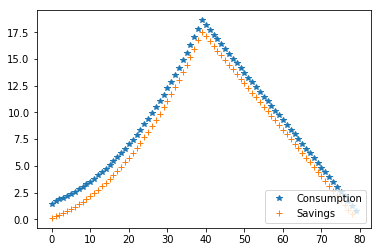

In [91]:
nvec = np.zeros((S, 1))
for i in range(S):
    if i+1 <= (S / 2): nvec[i] = 1
    else: nvec[i] = .2
        
params = (beta_s, sigma, nvec, L, A, alpha, delta_s, SStol)
bvec_guess = np.ones((S-1))/2    
d = get_SS(params, bvec_guess, True)    
for key, item in d.items():
    print("{:10s}".format(key), ":", item)


SS wage goes up and SS rental rate goes down. The intuition here is that since you retire earlier your life time consumption is going to be lower as a result of working full time less frequently. The diminished labor supply increases the wage, while the same dimished labor supply decreases the value of capital which is a complementary factor of production. 